# Building a Decision Tree Model for Diabetes Prediction
## Import Required Packages

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import os

# Data Preparation 
### Load the dataset using Pandas

In [2]:
csv_path = f"{os.path.abspath(os.path.join(os.getcwd(), os.pardir))}/dataset/diabetes.csv"
diabetes_df = pd.read_csv(csv_path)

### Explore the dataset to understand its structure and features

In [3]:
# display the first few rows of the dataframe 
diabetes_df.head()

# display the structure and summary of the dataset
diabetes_df.info()
diabetes_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Split the Data 
Use the `train_test_split` function from `sklearn.model_selection` to split the dataset into training and testing sets.

In [4]:
# Define features and target variable
X = diabetes_df.drop("Outcome", axis=1) # features
y = diabetes_df["Outcome"] # target variable

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the Decision Tree Model
Create an instance of the `DecisionTreeClassifier` and fit it to the training data.

In [5]:
# create decision tree classifier object
dtc = DecisionTreeClassifier()

# train decision tree classifier
dtc = dtc.fit(X_train, y_train)

# Model Evaluation
### Use the trained model to make predictions on the test data

In [6]:
# predict the response for test dataset 
y_pred = dtc.predict(X_test)

### Calculate the accuracy of the model using the metrics module from scikit-learn

In [7]:
# model accuracy, how often if the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.70995670995671


# Visualise the Decision Tree
Visualise the trained decision tree using `plot_tree`.

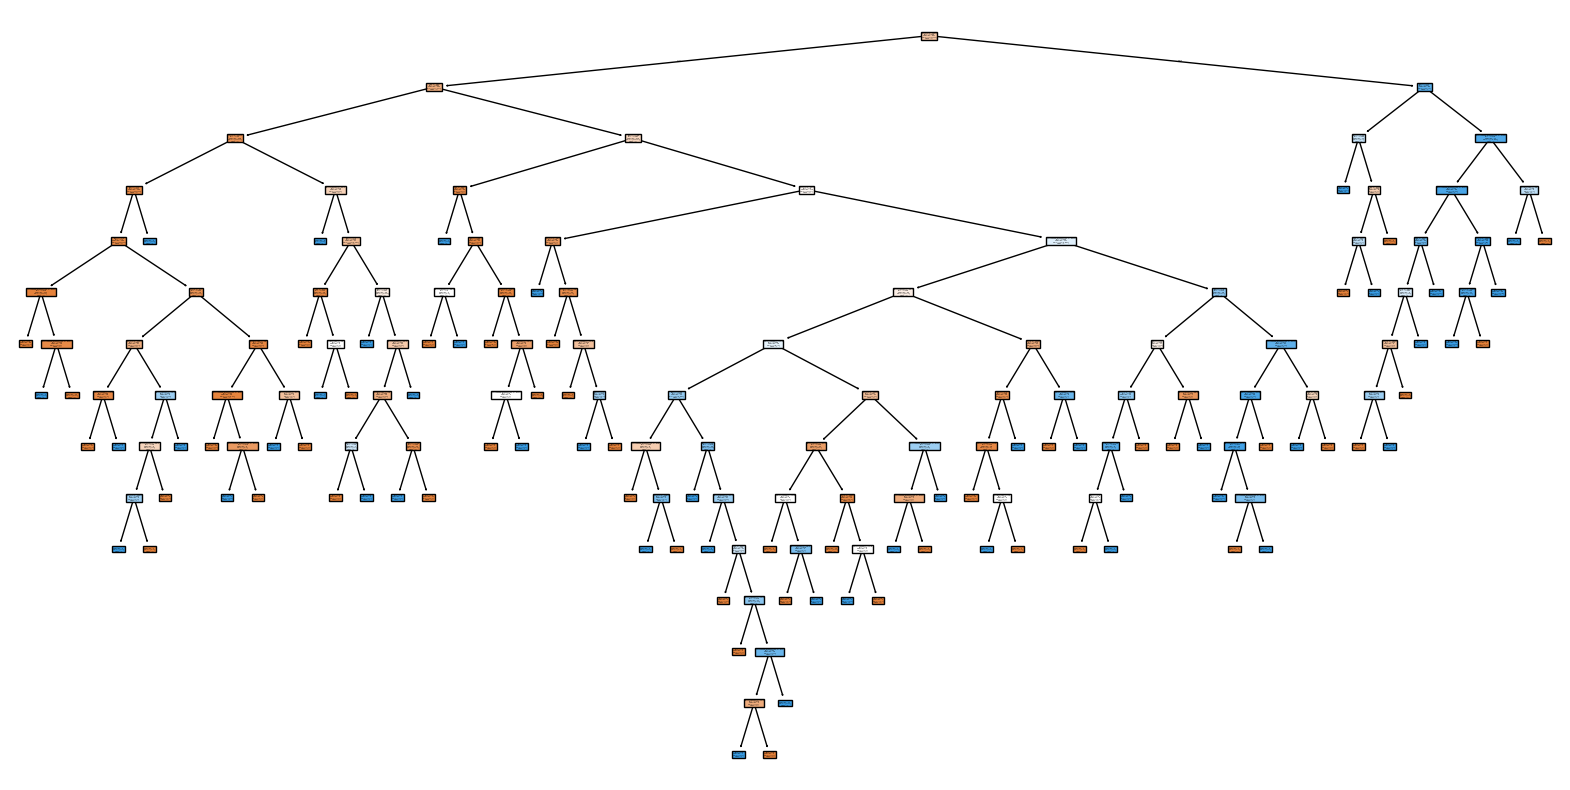

In [8]:
# visualise the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()